# Генерування штучного циклу ЕКГ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

## Сума несиметричних гаусових функцій

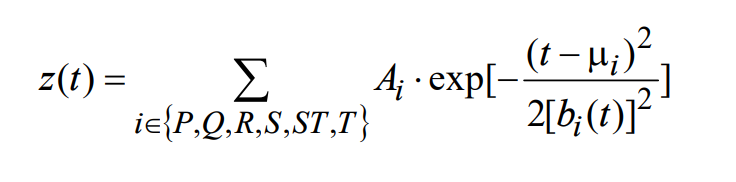

In [2]:
def z(t, A, B1, B2, MU):
    return np.sum(A * np.exp(-((t - MU) ** 2) / (2 * B1 ** 2)))

## Дані за замовчуванням

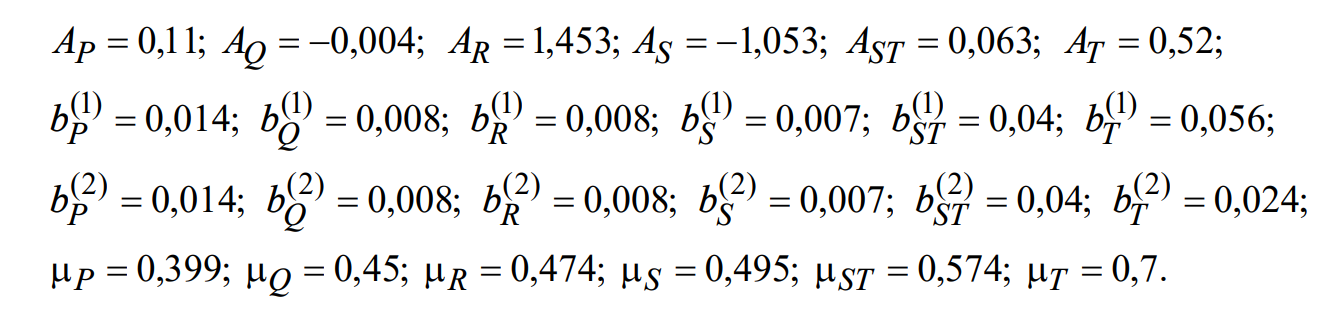

In [3]:
def get_ECG(grid=False, HR=65, Ap=0.41, Aq=-0.004, Ar=1.453, As=-1.053, Ast=0.063, At=0.52):

    t0 = 60 / HR
    
    A = np.array([Ap, Aq, Ar, As, Ast, At])
    B1 = np.array([0.14, 0.008, 0.008, 0.007, 0.04, 0.056])
    B2 = np.array([0.14, 0.008, 0.008, 0.007, 0.04, 0.04])
    MU = np.array([0.399, 0.45, 0.474, 0.495, 0.574, 0.7])
    
    t1 = MU - 3 * B1
    t2 = MU + 3 * B2

    T = pd.DataFrame(
        {'t1': pd.Series(t1, index=['P', 'Q', 'R', 'S', 'ST', 'T']),
        't2': pd.Series(t2, index=['P', 'Q', 'R', 'S', 'ST', 'T'])
        })
    
    T = [T.t1[i] for i in range(6)] + [T.t2[i] for i in range(6)]
    
    X = np.arange(T[0], t0, 0.01)
    Y = [z(x, A, B1, B2, MU) for x in X]
    
    figure, ax = plt.subplots(figsize=(7, 4))
    figure.suptitle('Штучна електрокардіограма')
    ax.set_xlabel('Інтервали між зубцями кардіограми, с')
    ax.set_ylabel('Амплітуда зубців, мВ')
    ax.grid(grid)
    ax.set_ylim(-1, 2)
    
    ax.plot(X, Y)

## Візуалізація штучного циклу ЕКГ

In [4]:
interact(get_ECG, grid=True, HR=(1, 200, 1), Ap=(-2, 2, 0.01),
         Aq=(-2, 2, 0.01), Ar=(-2, 3, 0.01), As=(-2, 2, 0.01),
         Ast=(-2, 2, 0.01), At=(-2, 2, 0.01))

interactive(children=(Checkbox(value=True, description='grid'), IntSlider(value=65, description='HR', max=200,…

<function __main__.get_ECG(grid=False, HR=65, Ap=0.41, Aq=-0.004, Ar=1.453, As=-1.053, Ast=0.063, At=0.52)>

## Підказка: нормальний стан амплітуди зубців

Амплітуда Р - Від 0.005 до 0.25

Амплітуда Q -  До 1/3R

Амплітуда R - До 2

Амплітуда S - Від -0.8

Амплітуда T - Від -0.08 до 0.08

## Генерація циклу ЕКГ з рощиреним налаштуванням

In [5]:
def z(t, A, B1, B2, MU):
    return np.sum(A * np.exp(-((t - MU) ** 2) / (2 * B1 ** 2)))


def get_ECG(grid=False, HR=65, Ap=0.41, Aq=-0.004, Ar=1.453, As=-1.053, Ast=0.063, At=0.52,
           b1p=0.014, b1q=0.008, b1r=0.008, b1s=0.007, b1st=0.04, b1t=0.056,
           mup=0.399, muq=0.45, mur=0.474, mus=0.495, must=0.574, mut=0.7):

    t0 = 60 / HR
    
    A = np.array([Ap, Aq, Ar, As, Ast, At])
    B1 = np.array([b1p, b1q, b1r, b1s, b1st, b1s])
    B2 = np.array([0.14, 0.008, 0.008, 0.007, 0.04, 0.04])
    MU = np.array([mup, muq, mur, mus, must, mut])
    
    t1 = MU - 3 * B1
    t2 = MU + 3 * B2

    T = pd.DataFrame(
        {'t1': pd.Series(t1, index=['P', 'Q', 'R', 'S', 'ST', 'T']),
        't2': pd.Series(t2, index=['P', 'Q', 'R', 'S', 'ST', 'T'])
        })
    
    T = [T.t1[i] for i in range(6)] + [T.t2[i] for i in range(6)]
    
    X = np.arange(T[0], t0, 0.01)
    Y = [z(x, A, B1, B2, MU) for x in X]
    
    figure, ax = plt.subplots(figsize=(7, 4))
    figure.suptitle('Штучна електрокардіограма')
    ax.set_xlabel('Інтервали між зубцями кардіограми, с')
    ax.set_ylabel('Амплітуда зубців, мВ')
    ax.grid(grid)
    
    ax.plot(X, Y, color='orange')

In [6]:
interact(get_ECG, grid=True, HR=(1, 200, 1),
         Ap=(-2, 2, 0.01), Aq=(-2, 2, 0.01), Ar=(-2, 3, 0.01), As=(-2, 2, 0.01), Ast=(-2, 2, 0.01), At=(-2, 2, 0.01),
         b1p=(0, 0.5, 0.01), b1q=(0, 0.5, 0.01), b1r=(0, 0.5, 0.01), b1s=(0, 0.5, 0.01), b1st=(0, 0.5, 0.01), b1t=(0, 0.5, 0.01),
         mup=(-1, 1, 0.01), muq=(-1, 1, 0.01), mur=(-1, 1, 0.01), mus=(-1, 1, 0.01), must=(-1, 1, 0.01), mut=(-1, 1, 0.01))

interactive(children=(Checkbox(value=True, description='grid'), IntSlider(value=65, description='HR', max=200,…

<function __main__.get_ECG(grid=False, HR=65, Ap=0.41, Aq=-0.004, Ar=1.453, As=-1.053, Ast=0.063, At=0.52, b1p=0.014, b1q=0.008, b1r=0.008, b1s=0.007, b1st=0.04, b1t=0.056, mup=0.399, muq=0.45, mur=0.474, mus=0.495, must=0.574, mut=0.7)>